In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import scripts.read_image_data as rid

In [20]:
from importlib import reload
reload(rid)

<module 'scripts.read_image_data' from '/home/mithrillion/Projects/EarthEngine/scripts/read_image_data.py'>

In [2]:
ds = rid.read_image_data(image_dir='2014/images/', mask_dir='2014/masks/', table_dir='2014/tables/LC8_SR.csv')

In [3]:
ds_new = rid.read_image_data(image_dir='2015/images/', mask_dir='2015/masks/', table_dir='2015/tables/LC8_SR.csv')

In [4]:
nt = list(ds_new.keys())

In [5]:
nt.sort()

In [6]:
times_to_fit = []
for t in nt:
    dt = datetime.datetime.fromtimestamp(t / 1000)
    dt = dt.replace(year=dt.year - 1)
    times_to_fit += [int(dt.timestamp() * 1000)]

In [21]:
interpolated = rid.interpolate_images(times_to_fit, ds, max_days_apart=60)

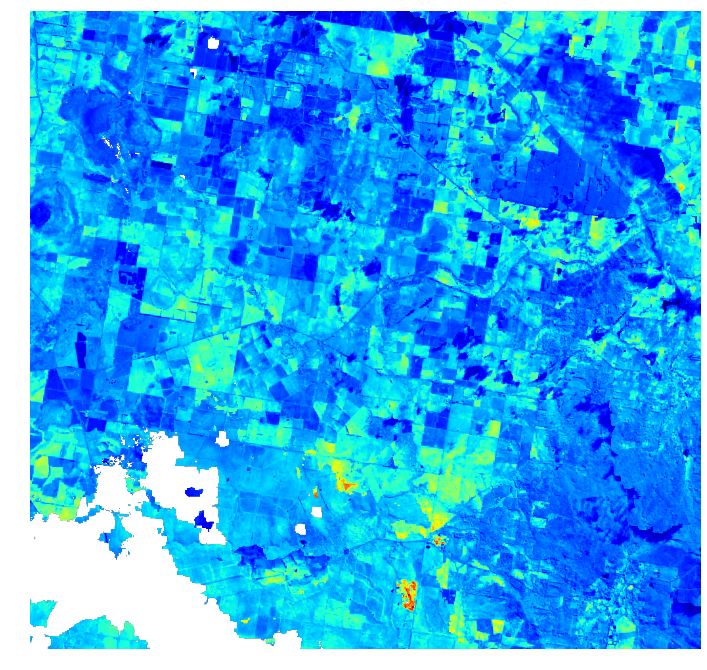

In [22]:
plt.figure(figsize=(12, 12))
plt.axis('off')
sel = interpolated[list(interpolated.keys())[1]][0, :, :]
plt.imshow(np.ma.masked_where(sel == -999, sel))